In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context='notebook', style='darkgrid',palette='dark', font_scale=1.2)
%matplotlib inline

In [90]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris,load_breast_cancer,load_digits

In [91]:
df = load_iris()
# df = load_breast_cancer()
# df=load_digits()

In [92]:
X = df.data
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [93]:
# Always do scaling where algorithms involves wts or computing distance as else model will be biased towards dataset whose scale is high
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# sc=StandardScaler()
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [94]:
class My_KMeans:
    def __init__(self, n_clusters=5, threshold=1e-3, epochs=50,n_iters=15):
        self.n_clusters = n_clusters
        self.threshold = threshold
        self.epochs = epochs
        self.cluster_centers_ = None
        self.n_iters=n_iters
        self.inertia_=float('inf')

    def kMeans(self, X):
        m, n = X.shape
        currentCost = float('inf')
        # initialize centroids randomly
        centroids = X[np.random.choice(
            m, self.n_clusters, replace=False)]

        # Clusters->
        clusters = [[] for _ in range(self.n_clusters)]
        # Labels->
        labels = np.zeros(m,dtype=int)

        # This loop will keep adjusting centeroids till we find optimal placements
        for _ in range(self.epochs):
            newCost = 0
            for idx,obs in enumerate(X):
                distances = np.sum(np.power(centroids-obs, 2), axis=1)
                nearestCentroid = np.argmin(distances)
                clusters[nearestCentroid].append(obs)
                
                # Adding min-dist to my cost
                newCost += distances[nearestCentroid]
                
                # updateing_labels
                labels[idx]=nearestCentroid

            # newCost /= m

            if abs(newCost-currentCost) < self.threshold:
                break

            currentCost = newCost
            new_centroids = []
            for i in range(self.n_clusters):
                mean_dist = np.mean(np.array(clusters[i]), axis=0)
                new_centroids.append(mean_dist)

            centroids = np.array(new_centroids)

        return centroids, currentCost,labels

    def fit(self, X):
        m, n = X.shape
        # initialize centroids randomly
        self.cluster_centers_ = X[np.random.choice(
            m, self.n_clusters, replace=False)]

        # This loop will make sure that we only pick centroids for points where cost less cmp to other
        for _ in range(self.n_iters):
            centroids, costForCentroids,labels = self.kMeans(X)
            # If find something better than update
            if (costForCentroids < self.inertia_):
                self.cluster_centers_ = centroids
                self.labels_ = labels
                self.inertia_ = costForCentroids

        return self

In [95]:
# Setting-K
k=3

In [96]:
my_kmeans=My_KMeans(k)
my_kmeans.fit(X)

In [102]:
my_kmeans.__dict__

{'n_clusters': 3,
 'threshold': 0.001,
 'epochs': 50,
 'cluster_centers_': array([[0.707846  , 0.45187622, 0.79988106, 0.83004386],
        [0.19611111, 0.595     , 0.07830508, 0.06083333],
        [0.44519116, 0.30906511, 0.57754693, 0.55040323]]),
 'n_iters': 15,
 'inertia_': 6.9858404276936055,
 'labels_': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
        0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])}

In [103]:
kmeans=KMeans(k)
kmeans.fit(X)
kmeans.__dict__

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{'n_clusters': 3,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 'warn',
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'lloyd',
 'n_features_in_': 4,
 '_tol': 6.861018403562211e-06,
 '_n_init': 10,
 '_algorithm': 'lloyd',
 '_n_threads': 4,
 'cluster_centers_': array([[0.44125683, 0.30737705, 0.57571548, 0.54918033],
        [0.19611111, 0.595     , 0.07830508, 0.06083333],
        [0.70726496, 0.4508547 , 0.79704476, 0.82478632]]),
 '_n_features_out': 3,
 'labels_': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2,

Text(0.5, 1.0, 'sklearns-Kmeans')

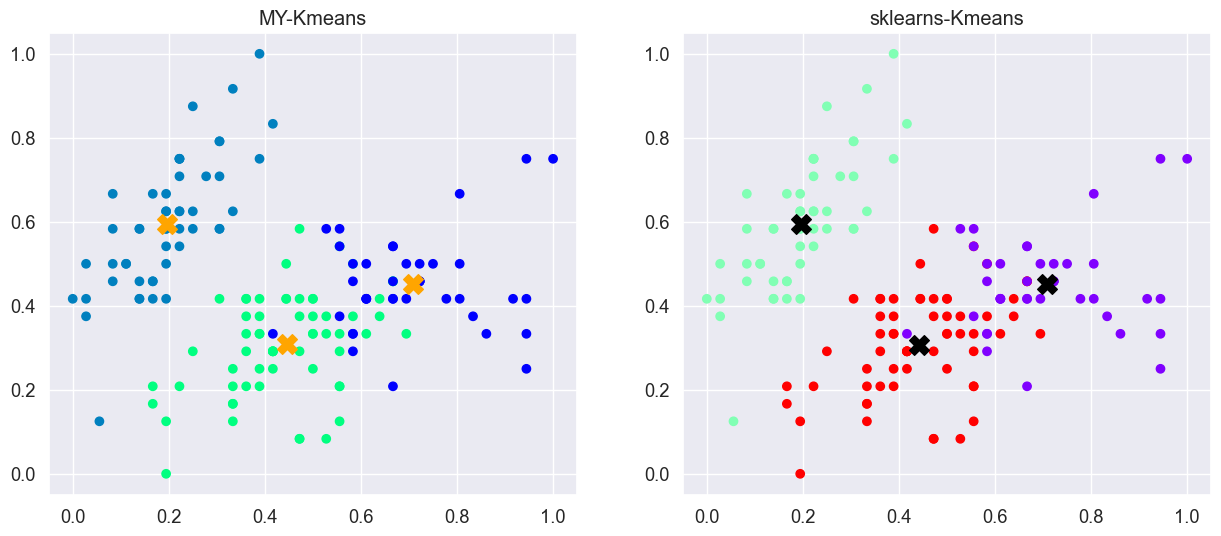

In [101]:

# ============================= My_KMeans =================================>

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# Get the coordinates of the cluster centers
my_centroids = my_kmeans.cluster_centers_
myLabels = my_kmeans.labels_
# Visualize the clusters (for simplicity, we'll use only the first two features)
ax[0].scatter(X[:, 0], X[:, 1], c=myLabels, cmap="winter")
ax[0].scatter(my_centroids[:, 0], my_centroids[:, 1],
              c='orange', marker='X', s=200)
ax[0].set_title("MY-Kmeans")


# ============================= SKLEARN =================================>

# Get the coordinates of the cluster centers
skLearnsCentroid = kmeans.cluster_centers_
skLearnsLabels = kmeans.labels_
# Visualize the clusters (for simplicity, we'll use only the first two features)
ax[1].scatter(X[:, 0], X[:, 1], c=skLearnsLabels, cmap='rainbow')
ax[1].scatter(skLearnsCentroid[:, 0], skLearnsCentroid[:, 1],
              c='black', marker='X', s=200)
ax[1].set_title("sklearns-Kmeans")

### `The Thing is this is really slow for large datasets or datasets where scaling is not done properly, as it uses simple Looping rather than techniques like vectorization which can do task parallely and thus providing significatn boost in performancem`